In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
sns.set_context(context='notebook',font_scale=1.3)
%matplotlib inline
import pandas as pd
import sqlite3 as sq
import scipy as sp
import sklearn as sk
#f = '/Users/jeffreychapple/Documents/myskedmproject/skedm-master/skedm'
#sys.path.append(f)

In [2]:
import skedm as edm
import buoypy.buoypy as bp

In [3]:
B = bp.realtime(41110)

In [4]:
B

In [5]:
X = B.txt()

In [6]:
X.head() #gives last 5 most recent data points

WDIR  WSPD  GST  WVHT   DPD  APD    MWD  PRES  ATMP  \
Date                                                                       
2017-09-19 13:29:00   NaN   NaN  NaN   1.0  12.0  6.0   94.0   NaN   NaN   
2017-09-19 12:59:00   NaN   NaN  NaN   1.1  13.0  6.0  105.0   NaN   NaN   
2017-09-19 12:29:00   NaN   NaN  NaN   1.1  13.0  6.3  102.0   NaN   NaN   
2017-09-19 11:59:00   NaN   NaN  NaN   1.1  13.0  5.9  102.0   NaN   NaN   
2017-09-19 11:29:00   NaN   NaN  NaN   1.2  13.0  6.4  102.0   NaN   NaN   

                     WTMP  DEWP  VIS  PTDY  TIDE  
Date                                              
2017-09-19 13:29:00  25.5   NaN  NaN   NaN   NaN  
2017-09-19 12:59:00  25.5   NaN  NaN   NaN   NaN  
2017-09-19 12:29:00  25.5   NaN  NaN   NaN   NaN  
2017-09-19 11:59:00  25.5   NaN  NaN   NaN   NaN  
2017-09-19 11:29:00  25.5   NaN  NaN   NaN   NaN

In [7]:
X.describe() #Gives statistical info for variables

WDIR  WSPD  GST         WVHT          DPD          APD          MWD  \
count   0.0   0.0  0.0  1872.000000  1872.000000  1871.000000  1871.000000   
mean    NaN   NaN  NaN     1.071848     8.647436     5.213629   131.645644   
std     NaN   NaN  NaN     0.529234     3.091799     1.253441    30.660048   
min     NaN   NaN  NaN     0.300000     3.000000     3.300000    54.000000   
25%     NaN   NaN  NaN     0.700000     6.000000     4.300000   111.000000   
50%     NaN   NaN  NaN     0.900000     8.000000     5.000000   129.000000   
75%     NaN   NaN  NaN     1.300000    11.000000     5.800000   146.500000   
max     NaN   NaN  NaN     3.300000    18.000000     9.700000   205.000000   

       PRES  ATMP         WTMP  DEWP  VIS  PTDY  TIDE  
count   0.0   0.0  1872.000000   0.0  0.0   0.0   0.0  
mean    NaN   NaN    27.239156   NaN  NaN   NaN   NaN  
std     NaN   NaN     1.089834   NaN  NaN   NaN   NaN  
min     NaN   NaN    25.000000   NaN  NaN   NaN   NaN  
25%     NaN   NaN    26.700000   NaN  NaN   NaN   NaN  
50%     NaN   NaN    27.300000   NaN  NaN   NaN   NaN  
75%     NaN   NaN    28.000000   NaN  NaN   NaN   NaN  
max     NaN   NaN    30.100000   NaN  NaN   NaN   NaN

In [8]:
X.fillna(0).head()  #fill NaN w/ 0's

WDIR  WSPD  GST  WVHT   DPD  APD    MWD  PRES  ATMP  \
Date                                                                       
2017-09-19 13:29:00   0.0   0.0  0.0   1.0  12.0  6.0   94.0   0.0   0.0   
2017-09-19 12:59:00   0.0   0.0  0.0   1.1  13.0  6.0  105.0   0.0   0.0   
2017-09-19 12:29:00   0.0   0.0  0.0   1.1  13.0  6.3  102.0   0.0   0.0   
2017-09-19 11:59:00   0.0   0.0  0.0   1.1  13.0  5.9  102.0   0.0   0.0   
2017-09-19 11:29:00   0.0   0.0  0.0   1.2  13.0  6.4  102.0   0.0   0.0   

                     WTMP  DEWP  VIS  PTDY  TIDE  
Date                                              
2017-09-19 13:29:00  25.5   0.0  0.0   0.0   0.0  
2017-09-19 12:59:00  25.5   0.0  0.0   0.0   0.0  
2017-09-19 12:29:00  25.5   0.0  0.0   0.0   0.0  
2017-09-19 11:59:00  25.5   0.0  0.0   0.0   0.0  
2017-09-19 11:29:00  25.5   0.0  0.0   0.0   0.0

In [9]:
w = pd.DataFrame(X.WVHT) #extracting jut the wave height
p = pd.DataFrame(X.DPD)  #extracting just the dominant period
wd = pd.DataFrame(X.MWD) #extracting just wind direction
ap = pd.DataFrame(X.APD) #"              "average period
wt = pd.DataFrame(X.WTMP) #"              "water temp

len(w), len(p), len(wd), len(ap), len(wt)

(1872, 1872, 1872, 1872, 1872)

In [10]:
w.head() # looking at new variable dataframe

WVHT
Date                     
2017-09-19 13:29:00   1.0
2017-09-19 12:59:00   1.1
2017-09-19 12:29:00   1.1
2017-09-19 11:59:00   1.1
2017-09-19 11:29:00   1.2

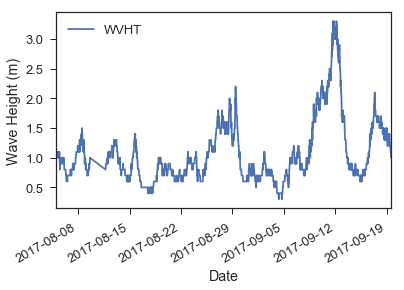

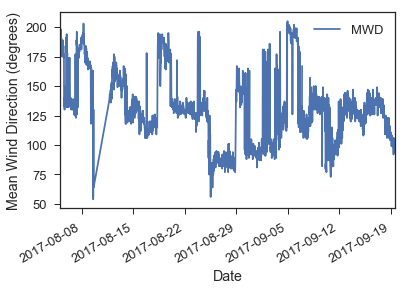

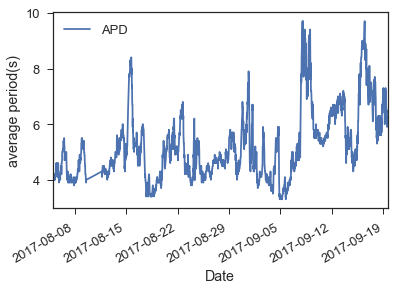

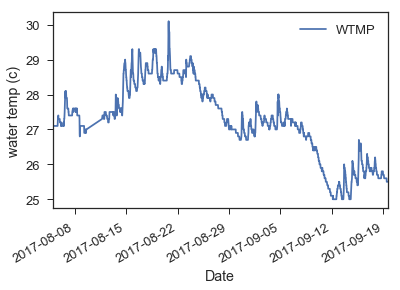

In [11]:
#test plotting each variable from imported buoypy data
w.plot()
plt.ylabel('Wave Height (m)')
p.plot()
plt.ylabel('period (s)')
wd.plot()
plt.ylabel('Mean Wind Direction (degrees)')
ap.plot()
plt.ylabel('average period(s)')
wt.plot()
plt.ylabel('water temp (c)')


# Convert Dataframes to arrays and plot

In [12]:
w_array = w.values.astype(float) #extracting just the values of Wave data
p_array = p.values.astype(float)  #extracting just the values of period data
wd_array = wd.values.astype(float)  #extracting just the values of period data
ap_array = w.values.astype(float) #extracting just the values of average period
wt_array = p.values.astype(float)  #extracting just the values of water temp data

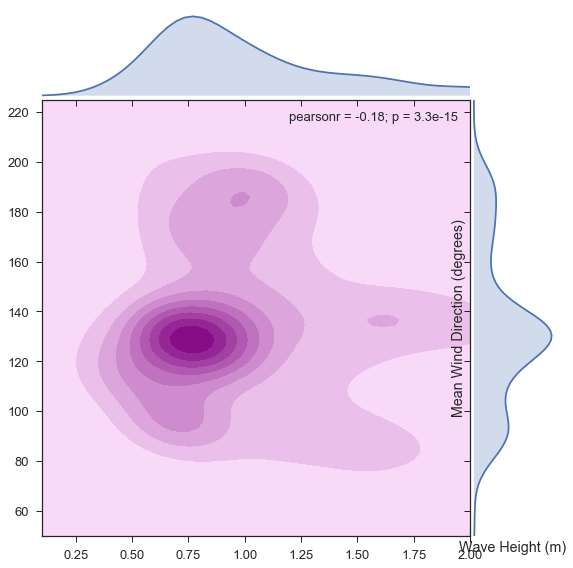

In [13]:
sns.palplot(sns.light_palette("purple", reverse=True))
pal = sns.light_palette("purple", as_cmap=True)
sns.jointplot(w_array,wd_array,kind='kde',size=8,space=0,xlim=(.1,2),ylim=(50,225),cmap=pal)
plt.xlabel('Wave Height (m)')
plt.ylabel('Mean Wind Direction (degrees)')

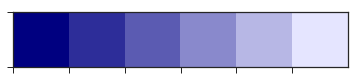

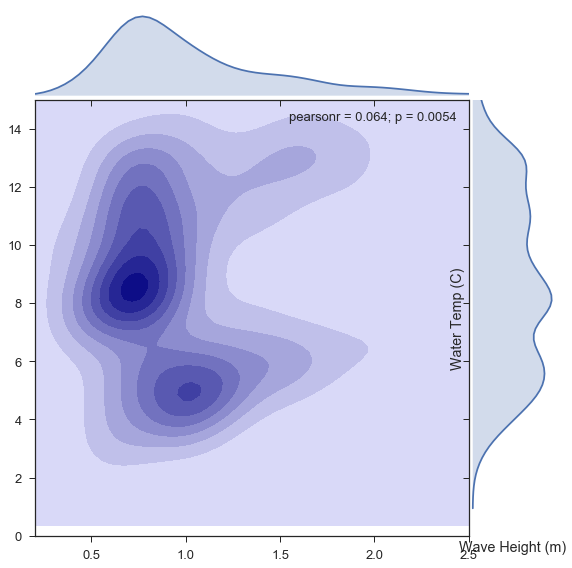

In [14]:
sns.palplot(sns.light_palette("navy", reverse=True))  #jointgrid class plot 
pal = sns.light_palette("navy", as_cmap=True)
sns.jointplot(w_array,wt_array,kind='kde',size=8,space=0,xlim=(.2,2.5),ylim=(0,15),cmap=pal)
plt.xlabel('Wave Height (m)')
plt.ylabel('Water Temp (C)')

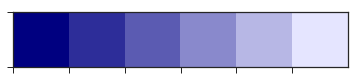

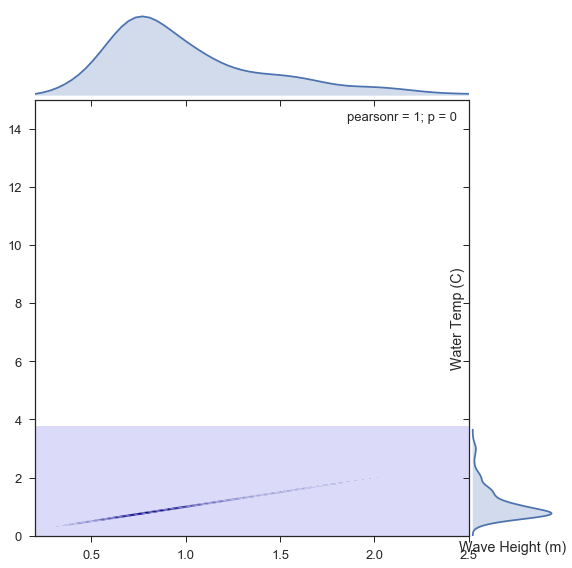

In [15]:
# couldn't plot Wave height and avgh period for some reson
sns.palplot(sns.light_palette("navy", reverse=True))  #jointgrid class plot 
pal = sns.light_palette("navy", as_cmap=True)
sns.jointplot(w_array,ap_array,kind='kde',size=8,space=0,xlim=(.2,2.5),ylim=(0,15),cmap=pal)
plt.xlabel('Wave Height (m)')
plt.ylabel('Water Temp (C)')

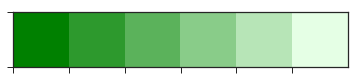

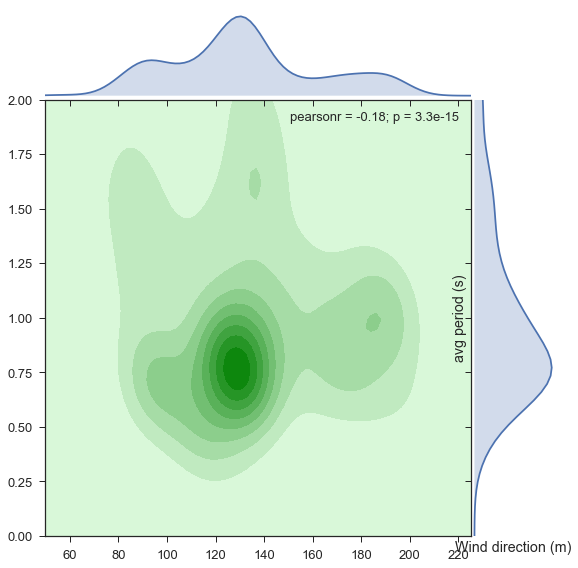

In [16]:
sns.palplot(sns.light_palette("green", reverse=True))  #jointgrid class plot 
pal = sns.light_palette("green", as_cmap=True)
sns.jointplot(wd_array,ap_array,kind='kde',size=8,space=0,xlim=(50,225),ylim=(0,2),cmap=pal)
plt.xlabel('Wind direction (m)')
plt.ylabel('avg period (s)')

## Linear Regression and Prediction

Here I am using the same scheme from above 'extracting just the wave height' from the larger buoypy dataframe and putting each variable into a datafrom...essentially it would suffice to start with the already defined 'w' variable but we are using the dataframe approach and use a similar (perhaps redundant scheme).



In [17]:
w = pd.DataFrame(X.WVHT) #extracting just the wave height
p = pd.DataFrame(X.DPD)  #extracting just the period
wd = pd.DataFrame(X.MWD) #extracting just wind direction
ap = pd.DataFrame(X.APD) #"              "average period
wt = pd.DataFrame(X.WTMP) #"              "water temp


### Just looking at the Wave Height Data

In [18]:
ww = w.resample('D').mean() #resampled the data-> daily avg

In [19]:
ww.plot(title='Average Daily Wave Height (1 month)')

In [20]:
ww.head()

WVHT
Date                
2017-08-05  0.997872
2017-08-06  0.742222
2017-08-07  0.924444
2017-08-08  1.208511
2017-08-09  0.800000

In [21]:
ww['wvht_shift1'] = ww['WVHT'].shift(1)  
ww['wvht_shift2'] = ww['WVHT'].shift(2)

In [22]:
ww.head()

WVHT  wvht_shift1  wvht_shift2
Date                                          
2017-08-05  0.997872          NaN          NaN
2017-08-06  0.742222     0.997872          NaN
2017-08-07  0.924444     0.742222     0.997872
2017-08-08  1.208511     0.924444     0.742222
2017-08-09  0.800000     1.208511     0.924444

In [23]:
ww.dropna().head() #getting rid of any NaN's

WVHT  wvht_shift1  wvht_shift2
Date                                          
2017-08-07  0.924444     0.742222     0.997872
2017-08-08  1.208511     0.924444     0.742222
2017-08-09  0.800000     1.208511     0.924444
2017-08-13  1.000000     1.089474     0.890909
2017-08-14  0.717391     1.000000     1.089474

In [24]:
ww['wvht_targets'] = ww['WVHT'].shift(-1) # setting targets and new dataframe

In [25]:
ww.head()

WVHT  wvht_shift1  wvht_shift2  wvht_targets
Date                                                        
2017-08-05  0.997872          NaN          NaN      0.742222
2017-08-06  0.742222     0.997872          NaN      0.924444
2017-08-07  0.924444     0.742222     0.997872      1.208511
2017-08-08  1.208511     0.924444     0.742222      0.800000
2017-08-09  0.800000     1.208511     0.924444           NaN

In [26]:
ww.dropna(inplace=True)

In [27]:
ww.head()

WVHT  wvht_shift1  wvht_shift2  wvht_targets
Date                                                        
2017-08-07  0.924444     0.742222     0.997872      1.208511
2017-08-08  1.208511     0.924444     0.742222      0.800000
2017-08-13  1.000000     1.089474     0.890909      0.717391
2017-08-14  0.717391     1.000000     1.089474      1.023810
2017-08-15  1.023810     0.717391     1.000000      0.646154

In [28]:
ww.columns #showing the coumns of new DF

Index(['WVHT', 'wvht_shift1', 'wvht_shift2', 'wvht_targets'], dtype='object')

In [29]:
ww_array = ww.values.astype(float) #extracting resampled values of Wave data

x = ww[['WVHT','wvht_shift1','wvht_shift2']].values #indexing by the values in the shifted dataframe with NaN's removed
                                                    #x is the first 
y = ww['wvht_targets'].values.reshape(-1,1) #

a = int(len(x)*0.67) #training size

trainx = x[:a]
testx = x[a:]

trainy = y[:a]
testy = y[a:]

from sklearn import linear_model
   
# Create Linear regression object
regr = linear_model.LinearRegression()

#train the model using training sets
regr.fit(trainx,trainy)

#Coefficients
print('coefficients: \n', regr.coef_)

# MSE (mean squared error)
print("Mean squared error: %.2f" 
      % np.mean((regr.predict(testx)-testy)**2))

#Explained variance score:  1 is perfect prediction
print ('Variance score: %.2f' % regr.score(testx, testy))


trainPredict = regr.predict(trainx) #plugging x into y = mx+b
testPredict = regr.predict(testx)


coefficients: 
 [[ 0.71017347 -0.17999555 -0.02414156]]
Mean squared error: 0.28
Variance score: 0.31


In [30]:
ww_array.shape,trainx.shape,testx.shape,trainy.shape,testy.shape

((39, 4), (26, 3), (13, 3), (26, 1), (13, 1))

In [31]:
#using this to view variables
trainPredict.shape, testPredict.shape

((26, 1), (13, 1))

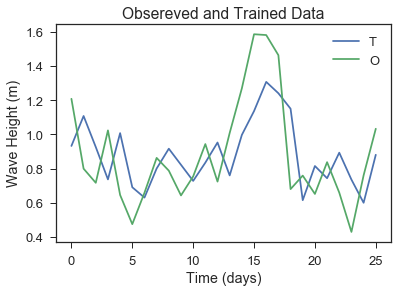

In [32]:
plt.plot(trainPredict) #prediction
plt.plot(trainy)  #data
plt.title('Obsereved and Trained Data')
plt.xlabel('Time (days)')
plt.ylabel('Wave Height (m)')
plt.legend('TO')

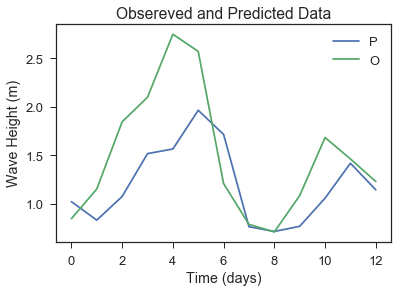

In [33]:
plt.plot(testPredict) #prediction
plt.plot(testy) #observed
plt.title('Obsereved and Predicted Data')
plt.xlabel('Time (days)')
plt.ylabel('Wave Height (m)')
plt.legend('PO')

In [34]:
dates = pd.DataFrame(pd.to_datetime(ww.reset_index()['Date']))
dates.rename(columns={'Date':''},inplace=True)

In [35]:
trX = np.empty((len(y),1))
trX[:a] = trainPredict
trX[a:] = np.nan

tstX = np.empty((len(y),1))
tstX[:a] = np.nan
tstX[a:] = testPredict

df = dates
df['targets'] = y
df['trainX'] = trX
df['tstX'] = tstX

df.set_index('', inplace=True)

In [36]:
df.plot(figsize=(10,8))
plt.title('Monthly Wave Height Linear Regression Prediciton Model (Daily Avgerage)')
plt.ylabel('Wave Height (m)')

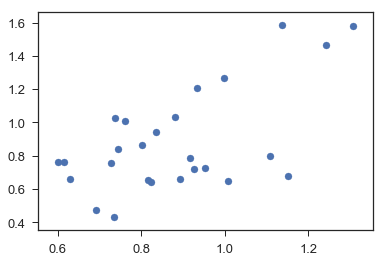

In [37]:
plt.scatter(trainPredict,trainy)

In [38]:
trainPredict;

In [39]:
len(trainy), len(trainPredict), len(testPredict.shape) 

(26, 26, 2)

In [40]:
ww_array.shape, trainPredict.size

((39, 4), 26)

# Attempt with SKEDM

In [41]:
w_array.shape #note that this is using the wvht sampled every 30 minutes...the raw data from the buoy
WH = w_array[:,0]
WH.shape

(1872,)

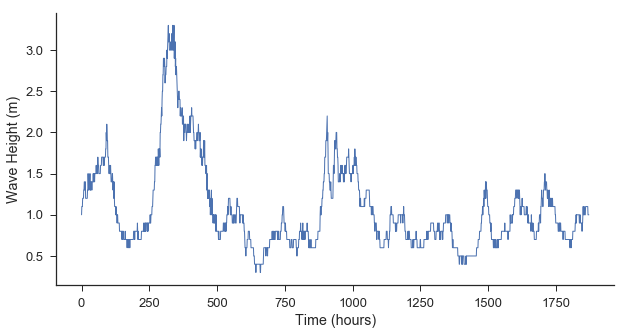

In [42]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(WH,linewidth=1)
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Wave Height (m)')
sns.despine()

# 2. calculate mutual information of time series

In [43]:
E = edm.Embed(WH) #initiate the embed class
E

In [44]:
max_lag = 120
mi = E.mutual_information(max_lag)

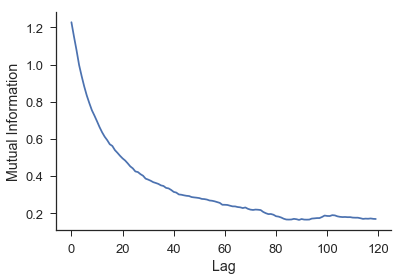

In [45]:
fig,ax=plt.subplots()
ax.plot(mi)
#ax.plot(mi2)
ax.set_xlabel('Lag')
ax.set_ylabel('Mutual Information')
sns.despine()

# 3. embed the time series

minimum at 1 so we use this as our lag

In [46]:
lag = 60
embed = 3
predict = 120 #predicting out to double to lag
WH,y = E.embed_vectors_1d(lag,embed,predict)

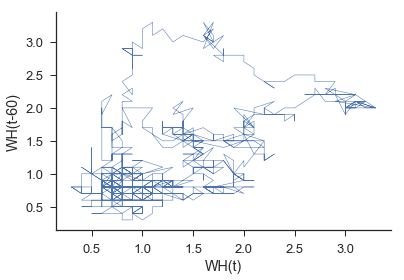

In [47]:
fig,ax = plt.subplots()
ax.plot(WH[:,0],WH[:,1],linewidth=.5)
ax.set_xlabel('WH(t)')
ax.set_ylabel('WH(t-60)')
sns.despine()


In [48]:
y.size,WH.size

(195840, 4896)

# 4. Train on first 75% of TS

In [49]:
#split it into training and testing sets
train_len = int(.75*len(WH))
Xtrain = WH[0:train_len]
ytrain = y[0:train_len]
Xtest = WH[train_len:]
ytest = y[train_len:]

In [50]:
Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape

((1224, 3), (1224, 120), (408, 3), (408, 120))

In [51]:
weights = 'distance' #use a distance weighting for the near neighbors
M = edm.Regression(weights) # initiate the nonlinear forecasting class

In [52]:
M.fit(Xtrain,ytrain) #fit the training data

# Predict last 25% of TS

In [53]:
nn_list = [10,100,500,1000]
ypred = M.predict(Xtest,nn_list)
print('ypred type :', type(ypred))
print('ypred len :', len(ypred))

ypred type : <class 'list'>
ypred len : 4


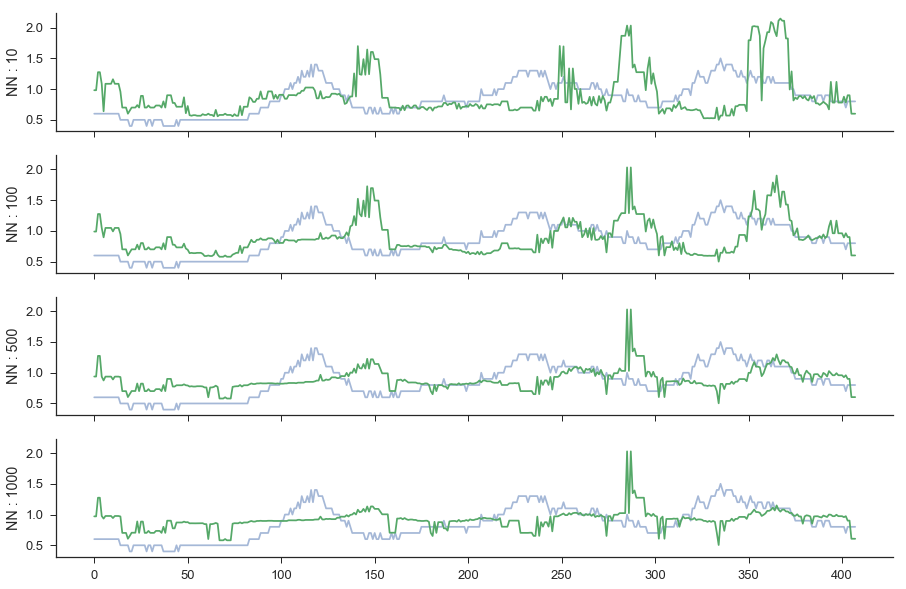

In [54]:
fig,axes = plt.subplots(4,figsize=(15,10),sharex=True,sharey=True)
ax = axes.ravel()

ax[0].plot(ytest[:,29],alpha=.5)
ax[0].plot(ypred[0][:,29])
ax[0].set_ylabel('NN : ' + str(nn_list[0]))

ax[1].plot(ytest[:,29],alpha=.5)
ax[1].plot(ypred[1][:,29])
ax[1].set_ylabel('NN : ' + str(nn_list[1]))

ax[2].plot(ytest[:,29],alpha=.5)
ax[2].plot(ypred[2][:,29])
ax[2].set_ylabel('NN : ' + str(nn_list[2]))


ax[3].plot(ytest[:,29],alpha=.5)
ax[3].plot(ypred[3][:,29])
ax[3].set_ylabel('NN : ' + str(nn_list[3]))

sns.despine()

# Score the predictions

In [55]:
score = M.score(ytest) #score the predictions against the actual values

In [56]:
print('score shape:', score.shape), score;

score shape: (4, 120)


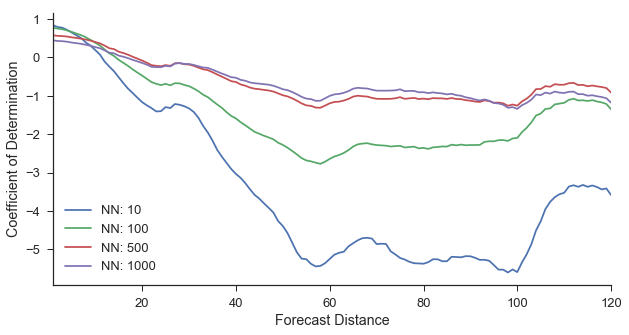

In [57]:
fig,ax = plt.subplots(figsize=(10,5))

for i in range(4):
    label = 'NN: ' + str(nn_list[i]) 
    ax.plot(range(1,121),score[i],label=label)
    
plt.legend(loc='lower left')
ax.set_ylabel('Coefficient of Determination')
ax.set_xlabel('Forecast Distance')
ax.set_xlim(1,120)
sns.despine()

# Calculate predictions for each near neighbor

In [58]:
ypred = M.predict_individual(Xtest,nn_list)
d_mean, d_std = M.dist_stats(nn_list)

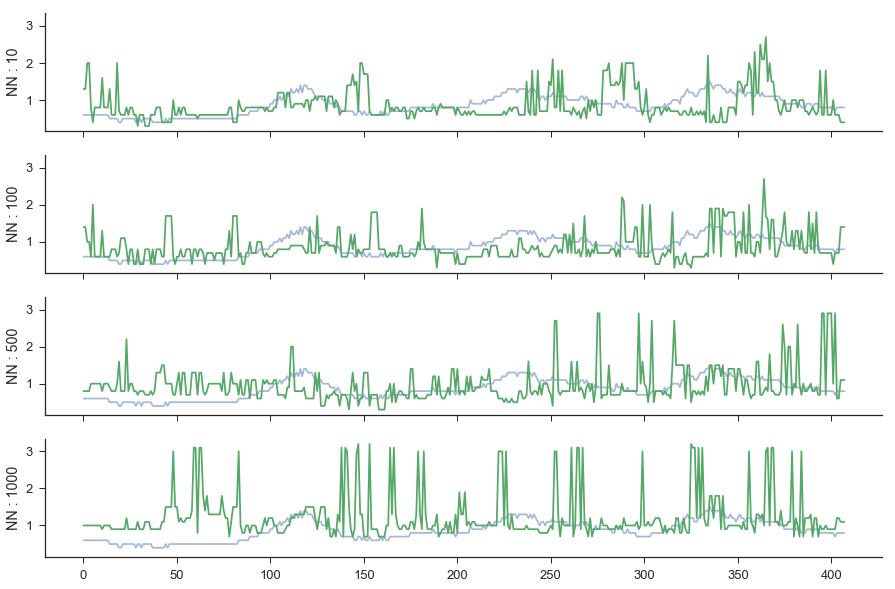

In [59]:
fig,axes = plt.subplots(4,figsize=(15,10),sharex=True,sharey=True)
ax = axes.ravel()

ax[0].plot(ytest[:,29],alpha=.5)
ax[0].plot(ypred[0][:,29])
ax[0].set_ylabel('NN : ' + str(nn_list[0]))

ax[1].plot(ytest[:,29],alpha=.5)
ax[1].plot(ypred[1][:,29])
ax[1].set_ylabel('NN : ' + str(nn_list[1]))

ax[2].plot(ytest[:,29],alpha=.5)
ax[2].plot(ypred[2][:,29])
ax[2].set_ylabel('NN : ' + str(nn_list[2]))


ax[3].plot(ytest[:,29],alpha=.5)
ax[3].plot(ypred[3][:,29])
ax[3].set_ylabel('NN : ' + str(nn_list[3]))

sns.despine()


# Score the Predictions

In [60]:
score = M.score(ytest)

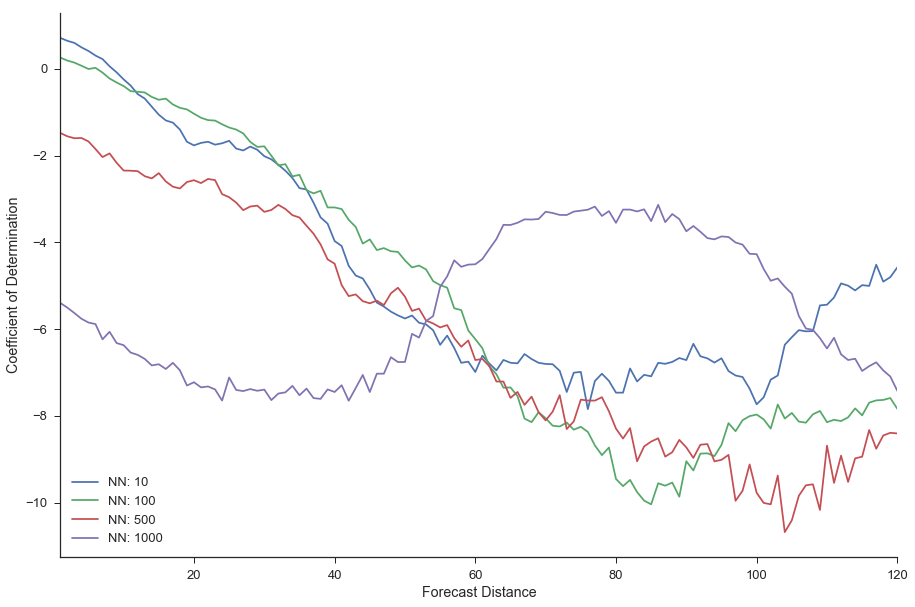

In [61]:
fig,ax = plt.subplots(figsize=(15,10))

for i in range(4):
    label = 'NN: ' + str(nn_list[i]) 
    ax.plot(range(1,121),score[i],label=label)
    
plt.legend(loc='lower left')
sns.despine()
ax.set_ylabel('Coefficient of Determination')
ax.set_xlabel('Forecast Distance')
ax.set_xlim(1,120);

# More Finely Predict

In [62]:
nn_list = np.arange(1,1000,10)
ypred = M.predict_individual(Xtest, nn_list)
d_mean, d_std = M.dist_stats(nn_list)

In [63]:
score = M.score(ytest)

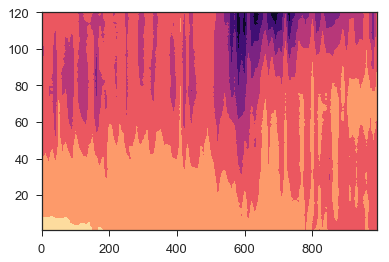

In [64]:
plt.contourf(nn_list,np.arange(1,121),score.T,cmap='magma')

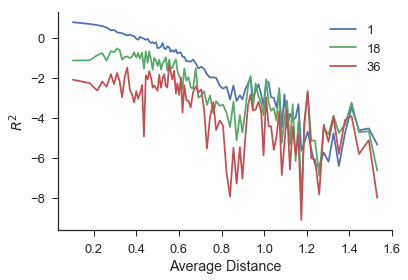

In [65]:
fig,ax = plt.subplots()
ax.plot(d_mean,score[:,0], label='1')
ax.plot(d_mean,score[:,14], label='18')
ax.plot(d_mean,score[:,29], label='36')
ax.legend()
sns.despine()
ax.set_ylabel('$R^2$')
ax.set_xlabel('Average Distance')

In [66]:
d_std.shape

(100,)

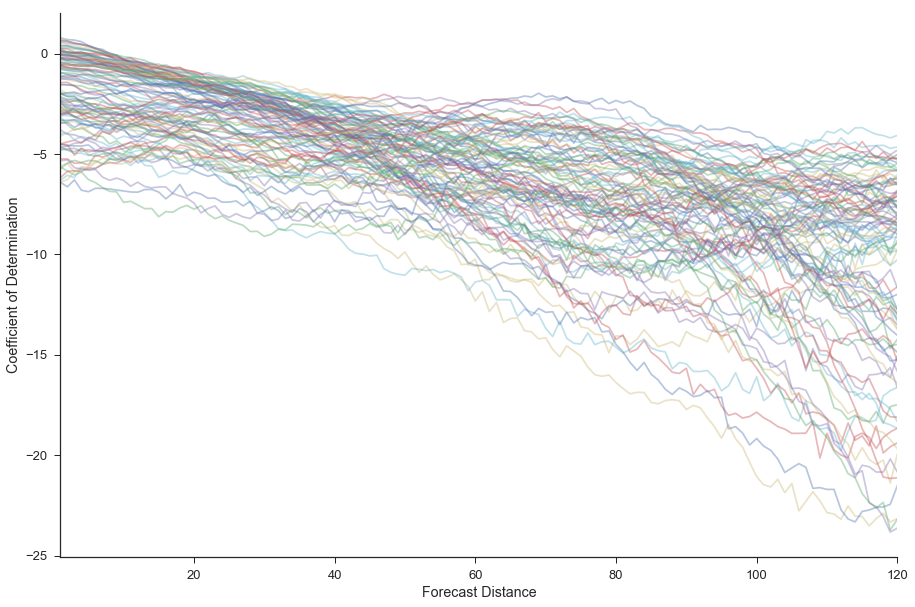

In [67]:
fig,ax = plt.subplots(figsize=(15,10))

for i in range(len(nn_list)):
    label = 'NN: ' + str(nn_list[i]) 
    ax.plot(range(1,121),score[i],label=label,alpha=.4)
    
#plt.legend(loc='lower left')
sns.despine()
ax.set_ylabel('Coefficient of Determination')
ax.set_xlabel('Forecast Distance')
ax.set_xlim(1,120);


# Historic Data

In [68]:
buoy = 41110
year = 2014

H = bp.historic_data(41110,year)

In [69]:
X = H.get_stand_meteo()

In [70]:
X.head();

In [71]:
X.tail();

In [72]:
X.describe();

In [73]:
w = pd.DataFrame(X.WVHT) #extracting jut the wave height
p = pd.DataFrame(X.DPD)  #extracting just the period
wd = pd.DataFrame(X.MWD) #extracting just wind direction
ap = pd.DataFrame(X.APD) #"              "average period
wt = pd.DataFrame(X.WTMP) #"              "water temp

In [74]:
len(w), len(p), len(wd), len(ap), len(wt)


(13680, 13680, 13680, 13680, 13680)

In [75]:
p.head(); #just to look at the data

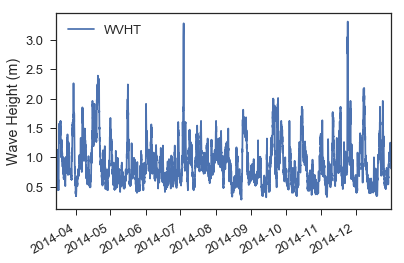

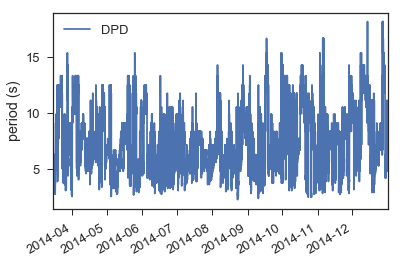

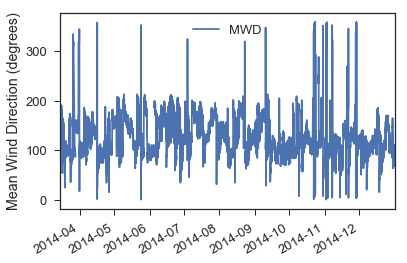

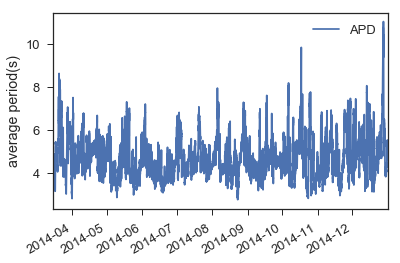

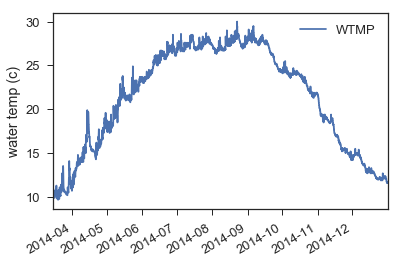

In [76]:
w.plot()
plt.ylabel('Wave Height (m)')
p.plot()
plt.ylabel('period (s)')
wd.plot()
plt.ylabel('Mean Wind Direction (degrees)')
ap.plot()
plt.ylabel('average period(s)')
wt.plot()
plt.ylabel('water temp (c)')


In [77]:
X.WVHT.head()

2014-03-14 17:40:00    0.53
2014-03-14 18:10:00    0.54
2014-03-14 18:40:00    0.53
2014-03-14 19:10:00    0.55
2014-03-14 19:40:00    0.57
Name: WVHT, dtype: float64

# Moving into arrays

In [78]:
w_array = w.values.astype(float) #extracting just the values of Wave data
p_array = p.values.astype(float)  #extracting just the values of period data
wd_array = wd.values.astype(float)  #extracting just the values of period data
ap_array = w.values.astype(float) #extracting just the values of average period
wt_array = p.values.astype(float)  #extracting just the values of water temp data

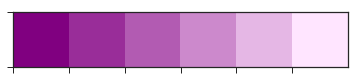

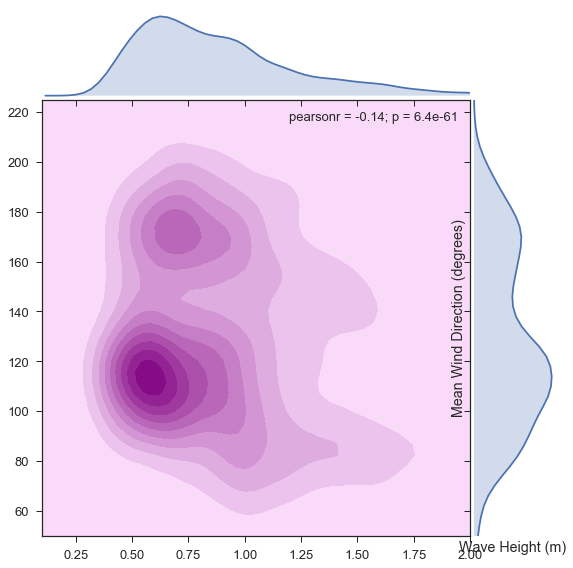

In [79]:
sns.palplot(sns.light_palette("purple", reverse=True))
pal = sns.light_palette("purple", as_cmap=True)
sns.jointplot(w_array,wd_array,kind='kde',size=8,space=0,xlim=(.1,2),ylim=(50,225),cmap=pal)
plt.xlabel('Wave Height (m)')
plt.ylabel('Mean Wind Direction (degrees)')

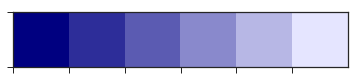

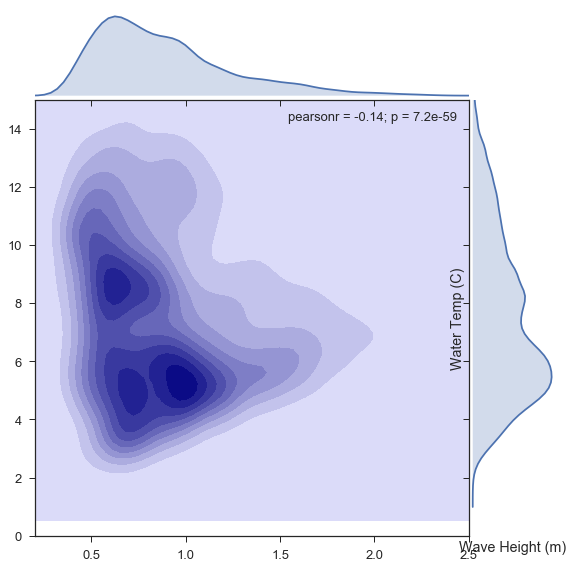

In [80]:
sns.palplot(sns.light_palette("navy", reverse=True))  #jointgrid class plot 
pal = sns.light_palette("navy", as_cmap=True)
sns.jointplot(w_array,wt_array,kind='kde',size=8,space=0,xlim=(.2,2.5),ylim=(0,15),cmap=pal)
plt.xlabel('Wave Height (m)')
plt.ylabel('Water Temp (C)')

Still no Wave vs temp plots?

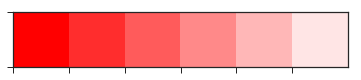

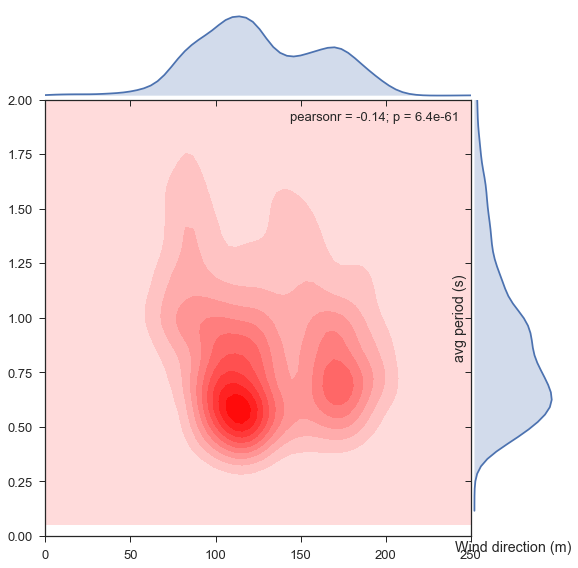

In [81]:
sns.palplot(sns.light_palette("red", reverse=True))  #jointgrid class plot 
pal = sns.light_palette("red", as_cmap=True)
sns.jointplot(wd_array,ap_array,kind='kde',size=8,space=0,xlim=(0,250),ylim=(0,2),cmap=pal)
plt.xlabel('Wind direction (m)')
plt.ylabel('avg period (s)')

# Linear Regression and data prediction

In [82]:
w = pd.DataFrame(X.WVHT) #extracting just the wave height
p = pd.DataFrame(X.DPD)  #extracting just the period
wd = pd.DataFrame(X.MWD) #extracting just wind direction
ap = pd.DataFrame(X.APD) #"              "average period
wt = pd.DataFrame(X.WTMP) #"              "water temp


# Just looking at the Wave Height Data

In [83]:
ww = w.resample('D').mean() #resampled the data-> daily avg

In [84]:
ww.head()

WVHT
2014-03-14  0.552308
2014-03-15  0.783542
2014-03-16  0.592083
2014-03-17  1.348542
2014-03-18  1.414043

In [85]:
ww.plot(title='Average Daily Wave Height (1 year)')

In [86]:
ww['wvht_shift1'] = ww['WVHT'].shift(1)  
ww['wvht_shift2'] = ww['WVHT'].shift(2)

In [87]:
ww.head()

WVHT  wvht_shift1  wvht_shift2
2014-03-14  0.552308          NaN          NaN
2014-03-15  0.783542     0.552308          NaN
2014-03-16  0.592083     0.783542     0.552308
2014-03-17  1.348542     0.592083     0.783542
2014-03-18  1.414043     1.348542     0.592083

In [88]:
ww.dropna().head() #getting rid of any NaN's

WVHT  wvht_shift1  wvht_shift2
2014-03-16  0.592083     0.783542     0.552308
2014-03-17  1.348542     0.592083     0.783542
2014-03-18  1.414043     1.348542     0.592083
2014-03-19  1.126875     1.414043     1.348542
2014-03-20  0.896667     1.126875     1.414043

In [89]:
ww['wvht_targets'] = ww['WVHT'].shift(-1) # setting targets and new dataframe

In [90]:
ww.head()

WVHT  wvht_shift1  wvht_shift2  wvht_targets
2014-03-14  0.552308          NaN          NaN      0.783542
2014-03-15  0.783542     0.552308          NaN      0.592083
2014-03-16  0.592083     0.783542     0.552308      1.348542
2014-03-17  1.348542     0.592083     0.783542      1.414043
2014-03-18  1.414043     1.348542     0.592083      1.126875

In [91]:
ww.dropna(inplace=True)

In [92]:
ww.head()

WVHT  wvht_shift1  wvht_shift2  wvht_targets
2014-03-16  0.592083     0.783542     0.552308      1.348542
2014-03-17  1.348542     0.592083     0.783542      1.414043
2014-03-18  1.414043     1.348542     0.592083      1.126875
2014-03-19  1.126875     1.414043     1.348542      0.896667
2014-03-20  0.896667     1.126875     1.414043      0.798298

In [93]:
ww.columns

Index(['WVHT', 'wvht_shift1', 'wvht_shift2', 'wvht_targets'], dtype='object')

In [94]:
ww_array = ww.values.astype(float) #extracting resampled values of Wave data

x=ww[['WVHT','wvht_shift1']]
#x = ww[['WVHT','wvht_shift1','wvht_shift2']].values #here used three different lags 
y = ww['wvht_targets'].values.reshape(-1,1) 

a = int(len(x)*0.67) #training size

trainx = x[:a]
testx = x[a:]

trainy = y[:a]
testy = y[a:]

from sklearn import linear_model
   
# Create Linear regression object
regr = linear_model.LinearRegression()

#train the model using training sets
regr.fit(trainx,trainy)

#Coefficients
print('coefficients: \n', regr.coef_)

# MSE (mean squared error)
print("Mean squared error: %.2f" 
      % np.mean((regr.predict(testx)-testy)**2))

#Explained variance score:  1 is perfect prediction
print ('Variance score: %.2f' % regr.score(testx, testy))


trainPredict = regr.predict(trainx) #plugging x into y = mx+b
testPredict = regr.predict(testx)


coefficients: 
 [[ 0.81543516 -0.27864618]]
Mean squared error: 0.08
Variance score: 0.32


In [95]:
1-np.sum((testPredict-testy)**2)/np.sum((testy-np.mean(testy))**2) #coefficient of Det.

0.31609230471338978

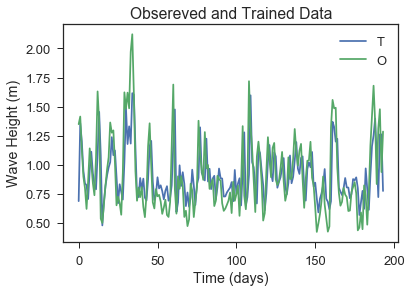

In [96]:
plt.plot(trainPredict)
plt.plot(trainy)
plt.title('Obsereved and Trained Data')
plt.xlabel('Time (days)')
plt.ylabel('Wave Height (m)')
plt.legend('TO')

In [97]:
plt.plot(testPredict)
plt.plot(testy)
plt.title('Obsereved and Predicted Data')
plt.xlabel('Time (days)')
plt.ylabel('Wave Height (m)')
plt.legend('PO')

In [98]:
dates = pd.DataFrame(pd.to_datetime(ww.reset_index()['index']))
dates.rename(columns={'index':''},inplace=True)

In [99]:
trX = np.empty((len(y),1))
trX[:a] = trainPredict
trX[a:] = np.nan

tstX = np.empty((len(y),1))
tstX[:a] = np.nan
tstX[a:] = testPredict

df = dates
df['targets'] = y
df['trainX'] = trX
df['tstX'] = tstX

df.set_index('', inplace=True)

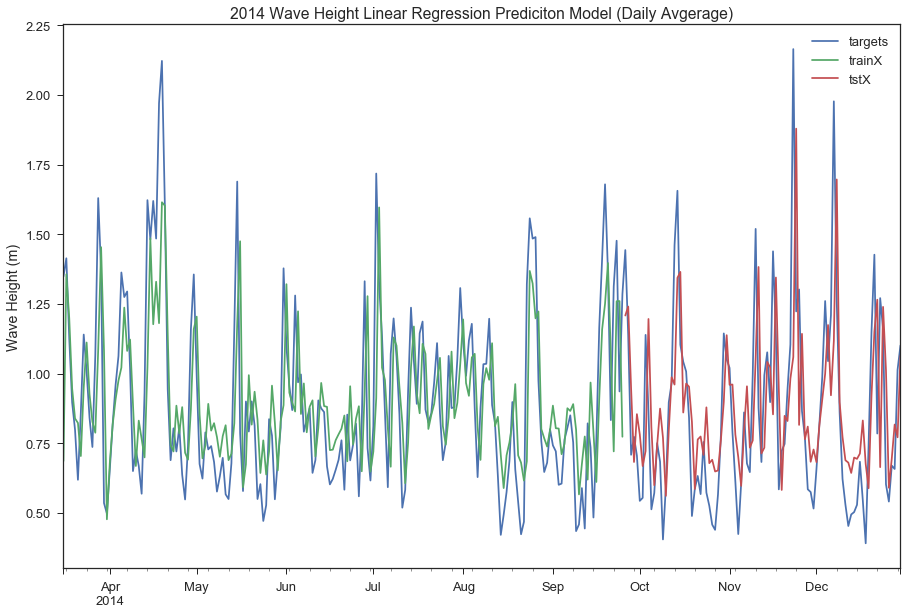

In [100]:
df.plot(figsize=(15,10))
plt.title('2014 Wave Height Linear Regression Prediciton Model (Daily Avgerage)')
plt.ylabel('Wave Height (m)')

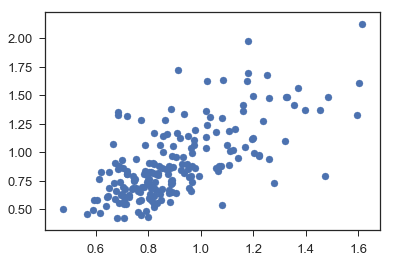

In [101]:
plt.scatter(trainPredict,trainy)


# SKEDM

In [102]:
ww_array.shape #note the data has been resampled into daily average
WH = ww_array[:,0]
WH.shape

(290,)

In [103]:
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(WH,linewidth=1.5)
ax.set_xlabel('Time')
ax.set_ylabel('Wave Height (m)')
sns.despine()

# Calculate the mutual information

In [104]:
E = edm.Embed(WH) #initiate the embed class
E

In [105]:
max_lag = 10
mi = E.mutual_information(max_lag)

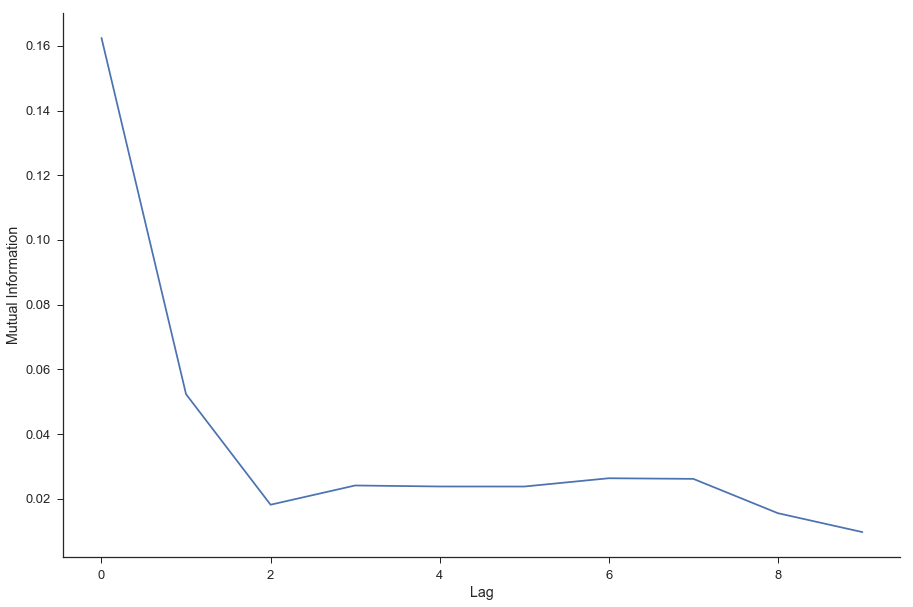

In [106]:
fig,ax=plt.subplots(figsize=(15,10))
ax.plot(mi)
#ax.plot(mi2)
ax.set_xlabel('Lag')
ax.set_ylabel('Mutual Information')
sns.despine()

# Embed the time series

first minimum is at 2 so use this lag

In [107]:
lag = 2
embed = 3
predict = 4 #predicting out to double to lag
WH,y = E.embed_vectors_1d(lag,embed,predict)

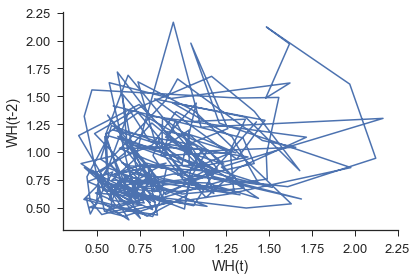

In [108]:
fig,ax = plt.subplots()
ax.plot(WH[:,0],WH[:,1],linewidth=1.5)
ax.set_xlabel('WH(t)')
ax.set_ylabel('WH(t-2)')
sns.despine()


# Train on first 75% of TS

In [109]:
#split it into training and testing sets
train_len = int(.75*len(WH))
Xtrain = WH[0:train_len]
ytrain = y[0:train_len]
Xtest = WH[train_len:]
ytest = y[train_len:]

Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape

((211, 3), (211, 4), (71, 3), (71, 4))

In [110]:
weights = 'distance' #use a distance weighting for the near neighbors
M = edm.Regression(weights) # initiate the nonlinear forecasting class

In [111]:
M.fit(Xtrain,ytrain) #fit the training data

# Predict last 25% of TS

In [112]:
nn_list = [1,5,10,15]
ypred = M.predict(Xtest,nn_list)
print('ypred type :', type(ypred))
print('ypred len :', len(ypred))

ypred type : <class 'list'>
ypred len : 4


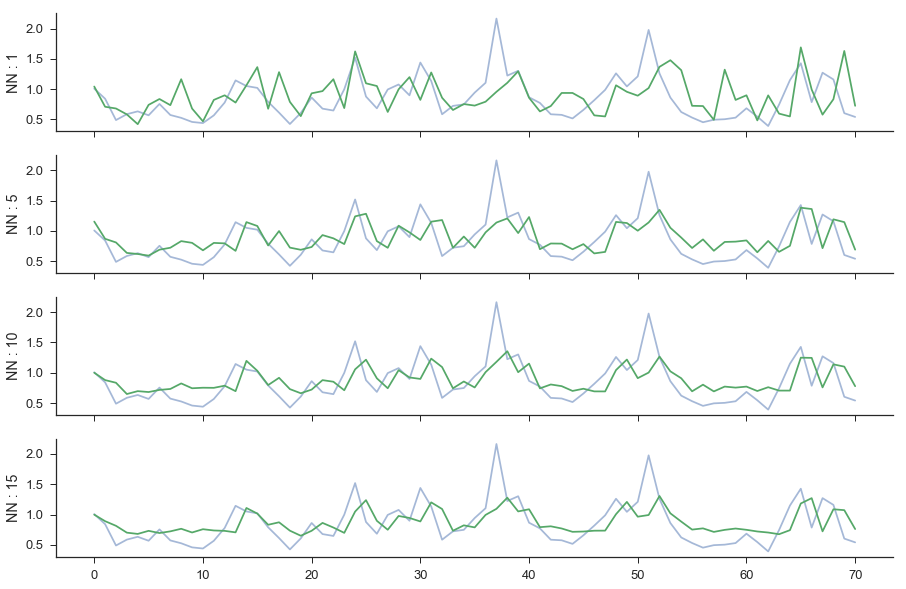

In [113]:
fig,axes = plt.subplots(4,figsize=(15,10),sharex=True,sharey=True)
ax = axes.ravel()

ax[0].plot(ytest[:,0],alpha=.5)
ax[0].plot(ypred[0][:,0])
ax[0].set_ylabel('NN : ' + str(nn_list[0]))

ax[1].plot(ytest[:,0],alpha=.5)
ax[1].plot(ypred[1][:,0])
ax[1].set_ylabel('NN : ' + str(nn_list[1]))

ax[2].plot(ytest[:,0],alpha=.5)
ax[2].plot(ypred[2][:,0])
ax[2].set_ylabel('NN : ' + str(nn_list[2]))


ax[3].plot(ytest[:,0],alpha=.5)
ax[3].plot(ypred[3][:,0])
ax[3].set_ylabel('NN : ' + str(nn_list[3]))

sns.despine()

# Score the predictions

In [114]:
score = M.score(ytest) #score the predictions against the actual values

In [115]:
print('score shape:', score.shape)

score shape: (4, 4)


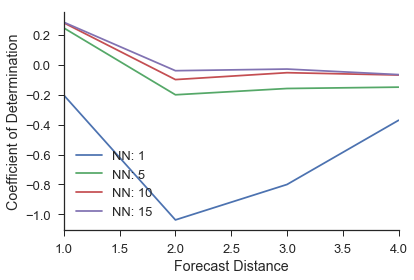

In [116]:
fig,ax = plt.subplots()

for i in range(4):
    label = 'NN: ' + str(nn_list[i]) 
    ax.plot(range(1,5),score[i],label=label)
    
plt.legend(loc='lower left')
ax.set_ylabel('Coefficient of Determination')
ax.set_xlabel('Forecast Distance')
ax.set_xlim(1,4)
sns.despine()

In [117]:
score

array([[-0.20259878, -1.03780361, -0.80048385, -0.37050013],
       [ 0.24744187, -0.19992566, -0.15787412, -0.14880136],
       [ 0.28183356, -0.09815969, -0.05204735, -0.06766987],
       [ 0.28577045, -0.0387061 , -0.02769922, -0.0648467 ]])

# Calculate Pred for each near neighbor

In [118]:
ypred = M.predict_individual(Xtest,nn_list)
d_mean, d_std = M.dist_stats(nn_list)

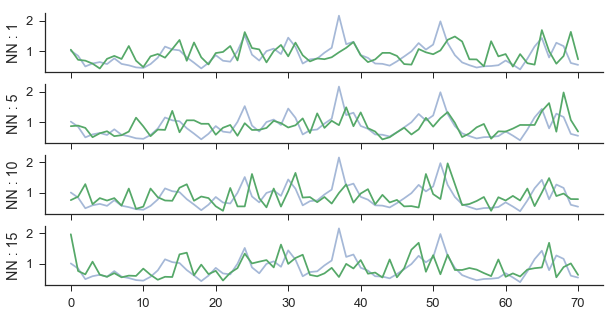

In [119]:
fig,axes = plt.subplots(4,figsize=(10,5),sharex=True,sharey=True)
ax = axes.ravel()

ax[0].plot(ytest[:,0],alpha=.5)
ax[0].plot(ypred[0][:,0])
ax[0].set_ylabel('NN : ' + str(nn_list[0]))

ax[1].plot(ytest[:,0],alpha=.5)
ax[1].plot(ypred[1][:,0])
ax[1].set_ylabel('NN : ' + str(nn_list[1]))

ax[2].plot(ytest[:,0],alpha=.5)
ax[2].plot(ypred[2][:,0])
ax[2].set_ylabel('NN : ' + str(nn_list[2]))


ax[3].plot(ytest[:,0],alpha=.5)
ax[3].plot(ypred[3][:,0])
ax[3].set_ylabel('NN : ' + str(nn_list[3]))

sns.despine()

# Score Pred

In [120]:
score = M.score(ytest)


In [121]:
fig,ax = plt.subplots()

for i in range(4):
    label = 'NN: ' + str(nn_list[i]) 
    ax.plot(range(1,5),score[i],label=label)
    
plt.legend(loc='lower left')
sns.despine()
ax.set_ylabel('Coefficient of Determination')
ax.set_xlabel('Forecast Distance')
ax.set_xlim(1,5);

# More finely Predict

In [122]:
nn_list = np.arange(1,200,10)
ypred = M.predict_individual(Xtest, nn_list)
d_mean, d_std = M.dist_stats(nn_list)


In [123]:
score = M.score(ytest)


In [124]:
plt.contourf(nn_list,np.arange(1,5),score.T,cmap='magma')
plt.colorbar()


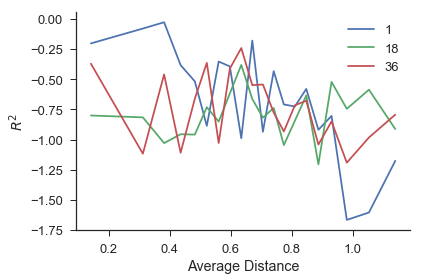

In [125]:
fig,ax = plt.subplots()
ax.plot(d_mean,score[:,0], label='1')
ax.plot(d_mean,score[:,2], label='18')
ax.plot(d_mean,score[:,3], label='36')
ax.legend()
sns.despine()
ax.set_ylabel('$R^2$')
ax.set_xlabel('Average Distance')

In [126]:
d_std.shape


(20,)

In [127]:
fig,ax = plt.subplots()

for i in range(len(nn_list)):
    label = 'NN: ' + str(nn_list[i]) 
    ax.plot(range(1,5),score[i],label=label,alpha=.4)
    
#plt.legend(loc='lower left')
sns.despine()
ax.set_ylabel('Coefficient of Determination')
ax.set_xlabel('Forecast Distance')
ax.set_xlim(1,4);

# Using Multiple Years of Data

In [128]:
buoy =41110
year = np.NAN
year_range = (2010,2012)

H = bp.historic_data(41110,year,year_range)

In [129]:
X = H.get_all_stand_meteo()

Jan2016 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111012016.txt.gz&dir=data/stdmet/Jan/
Feb2016 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111022016.txt.gz&dir=data/stdmet/Feb/
Mar2016 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111032016.txt.gz&dir=data/stdmet/Mar/
Apr2016 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111042016.txt.gz&dir=data/stdmet/Apr/
May2016 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111052016.txt.gz&dir=data/stdmet/May/
Jun2016 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111062016.txt.gz&dir=data/stdmet/Jun/
Jul2016 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111072016.txt.gz&dir=data/stdmet/Jul/
Aug2016 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111082016.txt.gz&dir=data/stdmet/Aug/
Sep2016 not in records
http://www.ndbc.noaa.gov/view_text_file.php?filename=4111

In [130]:
X.head()

WDIR  WSPD  GST  WVHT   DPD   APD    MWD  PRES  ATMP  \
2010-01-01 00:27:00   NaN   NaN  NaN  1.19  8.33  5.80  120.0   NaN   NaN   
2010-01-01 00:57:00   NaN   NaN  NaN  1.15  7.69  5.89  132.0   NaN   NaN   
2010-01-01 01:27:00   NaN   NaN  NaN  1.12  7.14  5.78  147.0   NaN   NaN   
2010-01-01 01:57:00   NaN   NaN  NaN  1.05  7.14  5.61  143.0   NaN   NaN   
2010-01-01 02:27:00   NaN   NaN  NaN  0.99  6.67  5.58  151.0   NaN   NaN   

                     WTMP  DEWP  VIS  TIDE  
2010-01-01 00:27:00  11.8   NaN  NaN   NaN  
2010-01-01 00:57:00  11.8   NaN  NaN   NaN  
2010-01-01 01:27:00  11.7   NaN  NaN   NaN  
2010-01-01 01:57:00  11.7   NaN  NaN   NaN  
2010-01-01 02:27:00  11.7   NaN  NaN   NaN

In [131]:
X.describe()

WDIR  WSPD  GST          WVHT           DPD           APD  \
count   0.0   0.0  0.0  48181.000000  48175.000000  48181.000000   
mean    NaN   NaN  NaN      0.903180      7.914201      4.829557   
std     NaN   NaN  NaN      0.379361      2.941850      0.985647   
min     NaN   NaN  NaN      0.230000      1.960000      2.750000   
25%     NaN   NaN  NaN      0.640000      5.560000      4.140000   
50%     NaN   NaN  NaN      0.820000      7.690000      4.690000   
75%     NaN   NaN  NaN      1.070000      9.880000      5.350000   
max     NaN   NaN  NaN      4.560000     20.000000     13.680000   

                MWD  PRES  ATMP          WTMP  DEWP  VIS  TIDE  
count  47335.000000   0.0   0.0  48191.000000   0.0  0.0   0.0  
mean     132.231921   NaN   NaN     19.574566   NaN  NaN   NaN  
std       42.763473   NaN   NaN      6.799057   NaN  NaN   NaN  
min        1.000000   NaN   NaN      6.200000   NaN  NaN   NaN  
25%      105.000000   NaN   NaN     13.600000   NaN  NaN   NaN  
50%      123.000000   NaN   NaN     20.700000   NaN  NaN   NaN  
75%      158.000000   NaN   NaN     26.000000   NaN  NaN   NaN  
max      359.000000   NaN   NaN     29.800000   NaN  NaN   NaN

In [132]:
X.fillna(0).head()

WDIR  WSPD  GST  WVHT   DPD   APD    MWD  PRES  ATMP  \
2010-01-01 00:27:00   0.0   0.0  0.0  1.19  8.33  5.80  120.0   0.0   0.0   
2010-01-01 00:57:00   0.0   0.0  0.0  1.15  7.69  5.89  132.0   0.0   0.0   
2010-01-01 01:27:00   0.0   0.0  0.0  1.12  7.14  5.78  147.0   0.0   0.0   
2010-01-01 01:57:00   0.0   0.0  0.0  1.05  7.14  5.61  143.0   0.0   0.0   
2010-01-01 02:27:00   0.0   0.0  0.0  0.99  6.67  5.58  151.0   0.0   0.0   

                     WTMP  DEWP  VIS  TIDE  
2010-01-01 00:27:00  11.8   0.0  0.0   0.0  
2010-01-01 00:57:00  11.8   0.0  0.0   0.0  
2010-01-01 01:27:00  11.7   0.0  0.0   0.0  
2010-01-01 01:57:00  11.7   0.0  0.0   0.0  
2010-01-01 02:27:00  11.7   0.0  0.0   0.0

In [133]:
w = pd.DataFrame(X.WVHT)
p = pd.DataFrame(X.DPD)
ap = pd.DataFrame(X.APD)
wd = pd.DataFrame(X.MWD)
wt = pd.DataFrame(X.WTMP)

len(w), len(p), len(wd), len(ap), len(wt)

(48191, 48191, 48191, 48191, 48191)

In [134]:
w.head()

WVHT
2010-01-01 00:27:00  1.19
2010-01-01 00:57:00  1.15
2010-01-01 01:27:00  1.12
2010-01-01 01:57:00  1.05
2010-01-01 02:27:00  0.99

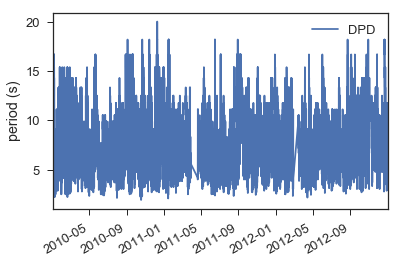

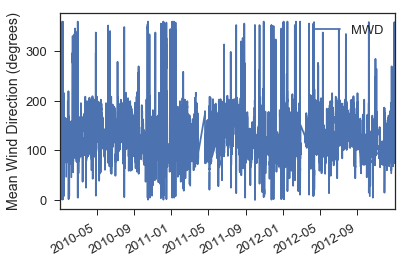

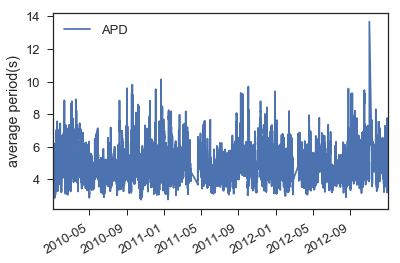

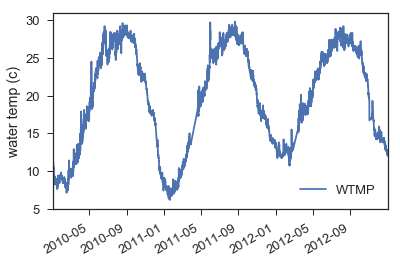

In [135]:
#test plotting each variable from imported buoypy data
w.plot()
plt.ylabel('Wave Height (m)')
p.plot()
plt.ylabel('period (s)')
wd.plot()
plt.ylabel('Mean Wind Direction (degrees)')
ap.plot()
plt.ylabel('average period(s)')
wt.plot()
plt.ylabel('water temp (c)')


# Moving into Arrays

In [136]:
#note this was really to use the seaborn plots

w_array = w.values.astype(float) #extracting just the values of Wave data
p_array = p.values.astype(float)  #extracting just the values of period data
wd_array = wd.values.astype(float)  #extracting just the values of period data
ap_array = w.values.astype(float) #extracting just the values of average period
wt_array = p.values.astype(float)  #extracting just the values of water temp data

In [137]:
w_array

array([[ 1.19],
       [ 1.15],
       [ 1.12],
       ..., 
       [ 0.55],
       [ 0.54],
       [ 0.55]])

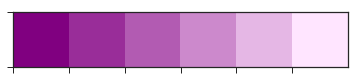

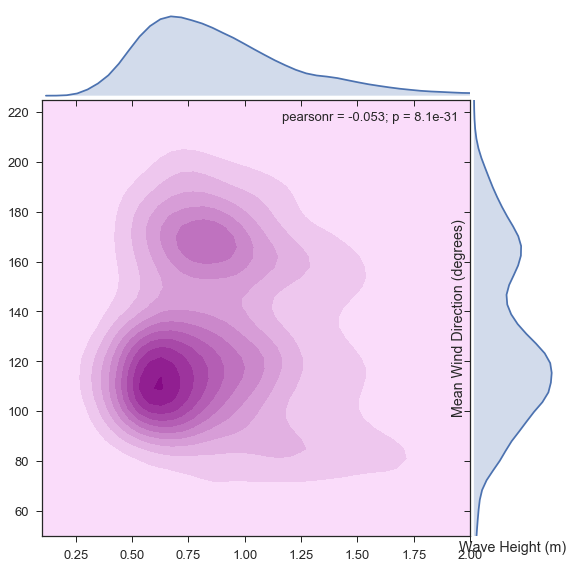

In [138]:
sns.palplot(sns.light_palette("purple", reverse=True))
pal = sns.light_palette("purple", as_cmap=True)
sns.jointplot(w_array,wd_array,kind='kde',size=8,space=0,xlim=(.1,2),ylim=(50,225),cmap=pal)
plt.xlabel('Wave Height (m)')
plt.ylabel('Mean Wind Direction (degrees)')

# Linear Regression Using Array values

In [139]:
ww = w.resample('D').mean() #resampled the data-> daily avg

In [140]:
ww.head()

WVHT
2010-01-01  0.890208
2010-01-02  0.780435
2010-01-03  0.745000
2010-01-04  0.572439
2010-01-05  0.531556

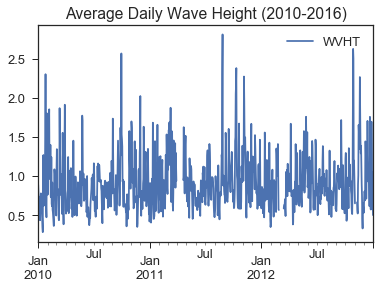

In [141]:
ww.plot(title='Average Daily Wave Height (2010-2016)')

In [142]:
ww.tail()

WVHT
2012-12-27  1.246458
2012-12-28  0.584167
2012-12-29  1.053125
2012-12-30  0.818723
2012-12-31  0.502917

In [143]:
ww['wvht_shift1'] = ww['WVHT'].shift(1)  #shiting through the data 
ww['wvht_shift2'] = ww['WVHT'].shift(2)

In [144]:
ww.head()

WVHT  wvht_shift1  wvht_shift2
2010-01-01  0.890208          NaN          NaN
2010-01-02  0.780435     0.890208          NaN
2010-01-03  0.745000     0.780435     0.890208
2010-01-04  0.572439     0.745000     0.780435
2010-01-05  0.531556     0.572439     0.745000

In [145]:
ww.dropna().head() #getting rid of any NaN's

WVHT  wvht_shift1  wvht_shift2
2010-01-03  0.745000     0.780435     0.890208
2010-01-04  0.572439     0.745000     0.780435
2010-01-05  0.531556     0.572439     0.745000
2010-01-06  0.520000     0.531556     0.572439
2010-01-07  0.436875     0.520000     0.531556

In [146]:
ww['wvht_targets'] = ww['WVHT'].shift(-1) # setting targets and new dataframe

In [147]:
ww.head()

WVHT  wvht_shift1  wvht_shift2  wvht_targets
2010-01-01  0.890208          NaN          NaN      0.780435
2010-01-02  0.780435     0.890208          NaN      0.745000
2010-01-03  0.745000     0.780435     0.890208      0.572439
2010-01-04  0.572439     0.745000     0.780435      0.531556
2010-01-05  0.531556     0.572439     0.745000      0.520000

In [148]:
ww.dropna(inplace=True)

In [149]:
ww.head()

WVHT  wvht_shift1  wvht_shift2  wvht_targets
2010-01-03  0.745000     0.780435     0.890208      0.572439
2010-01-04  0.572439     0.745000     0.780435      0.531556
2010-01-05  0.531556     0.572439     0.745000      0.520000
2010-01-06  0.520000     0.531556     0.572439      0.436875
2010-01-07  0.436875     0.520000     0.531556      0.737826

In [150]:
ww.columns # note the dtype is and object and not array values

Index(['WVHT', 'wvht_shift1', 'wvht_shift2', 'wvht_targets'], dtype='object')

In [151]:
ww_array = ww.values.astype(float) #extracting resampled values of Wave data

x = ww[['WVHT','wvht_shift1','wvht_shift2']].values
y = ww['wvht_targets'].values.reshape(-1,1) 

a = int(len(x)*0.67) #training size

trainx = x[:a]
testx = x[a:]

trainy = y[:a]
testy = y[a:]

from sklearn import linear_model
   
# Create Linear regression object
regr = linear_model.LinearRegression()

#train the model using training sets
regr.fit(trainx,trainy)

#Coefficients
print('coefficients: \n', regr.coef_)

# MSE (mean squared error)
print("Mean squared error: %.2f" 
      % np.mean((regr.predict(testx)-testy)**2))

#Explained variance score:  1 is perfect prediction
print ('Variance score: %.2f' % regr.score(testx, testy))


trainPredict = regr.predict(trainx) #plugging x into y = mx+b
testPredict = regr.predict(testx)


coefficients: 
 [[ 0.7196732  -0.25184495  0.10288884]]
Mean squared error: 0.07
Variance score: 0.36


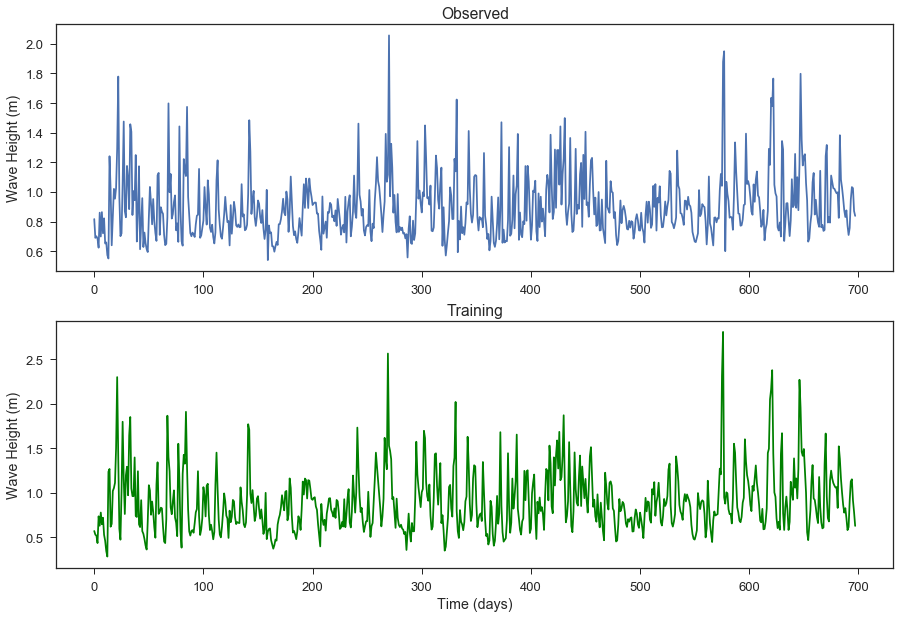

In [152]:
plt.figure(1,figsize =(15,10))

plt.subplot(211)
plt.plot(trainPredict)
plt.title('Observed')
plt.ylabel('Wave Height (m)')


plt.subplot(212)
plt.plot(trainy,'g')
plt.title('Training')
plt.xlabel('Time (days)')
plt.ylabel('Wave Height (m)')

plt.show()

In [153]:
plt.plot(trainPredict)
plt.plot(trainy)
plt.title('Obsereved and Trained Data')
plt.xlabel('Time (days)')
plt.ylabel('Wave Height (m)')
plt.legend('OT')

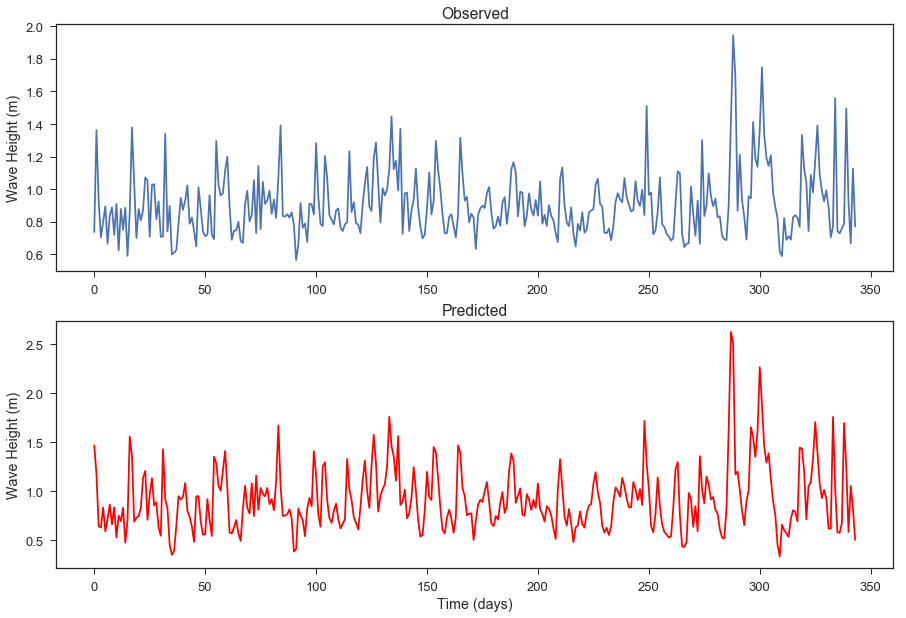

In [154]:
plt.figure(1,figsize =(15,10))

plt.subplot(211)
plt.plot(testPredict)
plt.title('Observed')
plt.ylabel('Wave Height (m)')


plt.subplot(212)
plt.plot(testy,'r')
plt.title('Predicted')
plt.xlabel('Time (days)')
plt.ylabel('Wave Height (m)')

plt.show()

In [155]:
plt.plot(testPredict)
plt.plot(testy)
plt.title('Obsereved and Predicted Data')
plt.xlabel('Time (days)')
plt.ylabel('Wave Height (m)')
plt.legend('PO')

In [156]:
dates = pd.DataFrame(pd.to_datetime(ww.reset_index()['index']))
dates.rename(columns={'index':''},inplace=True)

In [157]:
trX = np.empty((len(y),1))
trX[:a] = trainPredict
trX[a:] = np.nan

tstX = np.empty((len(y),1))
tstX[:a] = np.nan
tstX[a:] = testPredict

df = dates
df['targets'] = y
df['trainX'] = trX
df['tstX'] = tstX

df.set_index('', inplace=True)

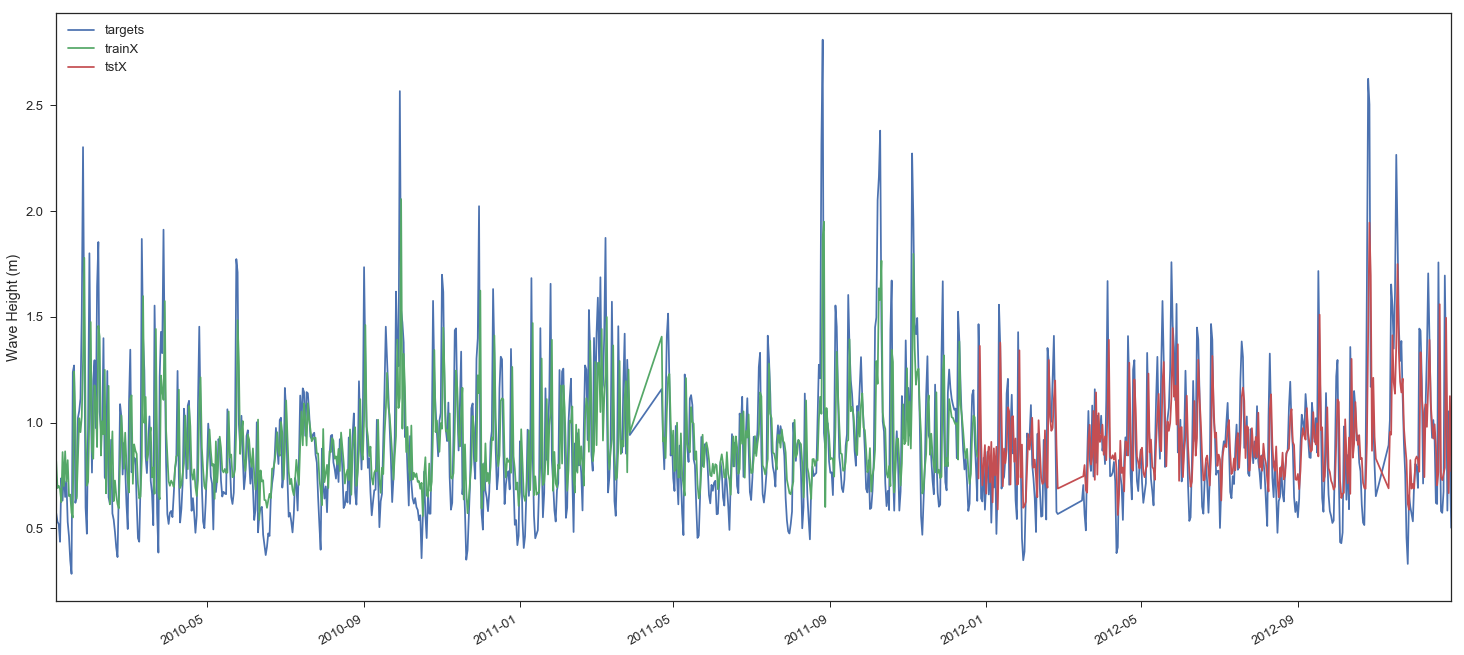

In [158]:
df.plot(figsize=(25,12))
plt.ylabel('Wave Height (m)')

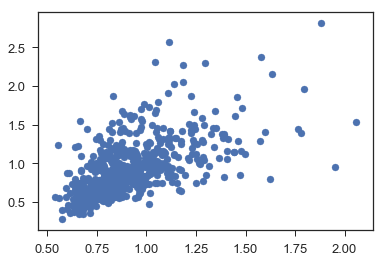

In [159]:
plt.scatter(trainPredict,trainy)


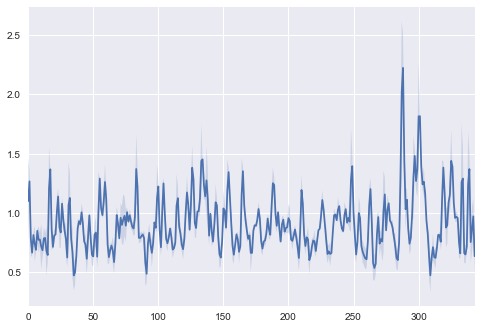

In [160]:
sns.set(style="darkgrid")
sns.tsplot((testPredict,testy))